In [ ]:
* México

The "quarente" in Mexico began on March 30, 2020. His first case in Jalisco, Mx, from Wuhan, China was on January 13, to according to his official website. https://www.gob.mx/cms/uploads/attachment/file/528534/Comunicado_Tecnico_CORONAVIRUS_24_DE_ENERO.pdf 

 # Made total test= 1011050
 # Total population= 125000000


In these graphs it is shown: 
    The mortality in México for Covid is 9.66%
    Their case and mortality data are constantly adjusting.
    They fail to flatten the infection curve.




In [5]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot  as plt

In [6]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
Data_all_countries = data[(data.location == "Spain") | (data.location == "Iran") | (data.location == "Netherlands") | (data.location == "Mexico") | (data.location == "Brazil")] #Filtering our countries from dataset

In [7]:
Data_all_countries.date = pd.to_datetime(Data_all_countries.date) #changing date to datetime and setting as index
data_covid = Data_all_countries.set_index("date")
data_covid.head(2)

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [8]:
del data_covid["handwashing_facilities"]
data_covid_columns = data_covid[["location","total_cases", "total_deaths", "new_cases", "new_deaths"]]
data_covid_columns

,location,total_cases,total_deaths,new_cases,new_deaths
date,,,,,
2019-12-31,Brazil,0.0,0.0,0.0,0.0
2020-01-01,Brazil,0.0,0.0,0.0,0.0
2020-01-02,Brazil,0.0,0.0,0.0,0.0
2020-01-03,Brazil,0.0,0.0,0.0,0.0
2020-01-04,Brazil,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-07-31,Spain,288522.0,28445.0,3092.0,2.0
2020-08-01,Spain,288522.0,28445.0,0.0,0.0
2020-08-02,Spain,288522.0,28445.0,0.0,0.0


In [9]:

data_brazil = data_covid_columns[data_covid_columns.location == "Brazil"] #dividing dataframe per country
data_spain = data_covid_columns[data_covid_columns.location == "Spain"] 
data_iran = data_covid_columns[data_covid_columns.location == "Iran"] 
data_mexico = data_covid_columns[data_covid_columns.location == "Mexico"]
data_netherlands = data_covid_columns[data_covid_columns.location == "Netherlands"]

In [10]:
start_q_spain = "2020-03-14"
start_q_brazil = "2020-03-17"
start_q_netherlands = "2020-03-12"
start_q_iran = "2020-03-25"
start_q_mexico = "2020-03-30"

In [11]:
data_mexico.tail

<bound method NDFrame.tail of            location  total_cases  total_deaths  new_cases  new_deaths
date                                                                 
2019-12-31   Mexico          0.0           0.0        0.0         0.0
2020-01-01   Mexico          0.0           0.0        0.0         0.0
2020-01-02   Mexico          0.0           0.0        0.0         0.0
2020-01-03   Mexico          0.0           0.0        0.0         0.0
2020-01-04   Mexico          0.0           0.0        0.0         0.0
...             ...          ...           ...        ...         ...
2020-08-01   Mexico     424637.0       46688.0     8458.0       688.0
2020-08-02   Mexico     434193.0       47472.0     9556.0       784.0
2020-08-03   Mexico     439046.0       47746.0     4853.0       274.0
2020-08-04   Mexico     443813.0       48012.0     4767.0       266.0
2020-08-05   Mexico     449961.0       48869.0     6148.0       857.0

[219 rows x 5 columns]>

Text(0.5, 1.0, 'Mexico total cases and total deaths')

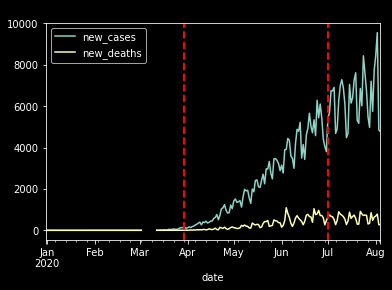

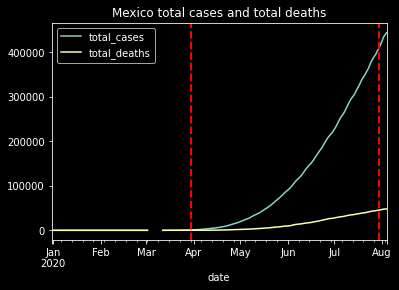

In [19]:
#México relation new cases, new deaths. 

ax = data_mexico[["new_cases", "new_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-30'), color='r', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2020-07-30'), color='r', linestyle='--', lw=2, label="test")
plt.title("Mexico daily deaths and new cases", color= 'black')
#plt.text(pd.to_datetime('2020-03-30'), 0.5, 'start', horizontalalignment='center')


ax = data_mexico[["total_cases", "total_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-30'), color='r', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2020-07-30'), color='r', linestyle='--', lw=2, label="test")
plt.title("Mexico total cases and total deaths")

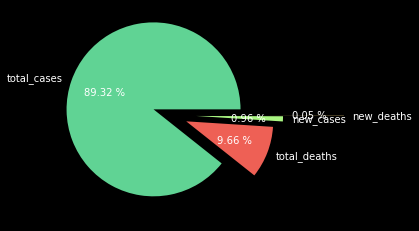

In [12]:
# With these data, we can see that the mortality rate is 9.66%
n_mx= data_mexico.tail(1)
mx_x = [443813.0,48012.0,	4767.0,	266.0]
mx_y = ["total_cases","total_deaths","new_cases","new_deaths"]
desfase = (0.2,0.2 , 0.3, 1)
colores =  ["#60D394","#EE6055","#AAF683","#FFD97D","#FF9B85"]
plt.pie(mx_x, labels=mx_y, autopct="%0.2f %%", colors=colores, explode=desfase)
plt.show()

In [ ]:
n_mx= data_mexico.total_cases.tail(1)

In [ ]:
# With these data, we can see that the mortality rate is 9.66%
n_mx= data_mexico.total_cases.tail(1)
mx_x = [443813.0,48012.0,	4767.0,	266.0]
mx_y = ["total_cases","total_deaths"]
desfase = (0.2,0.2 , 0.3, 1)
colores =  ["#60D394","#EE6055","#AAF683","#FFD97D","#FF9B85"]
plt.pie(mx_x, labels=mx_y, autopct="%0.2f %%", colors=colores, explode=desfase)
plt.show()

In [13]:
#review null data
dmx= data_mexico.isnull().sum()
dmx

location        0
total_cases     8
total_deaths    8
new_cases       8
new_deaths      8
dtype: int64

In [27]:
data_mexico.dtypes

location         object
total_cases     float64
total_deaths    float64
new_cases       float64
new_deaths      float64
dtype: object

In [28]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

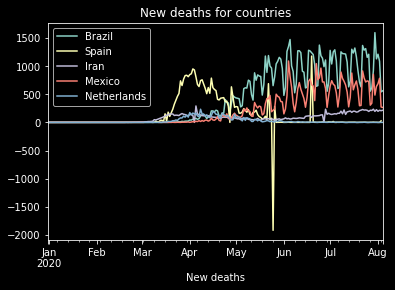

In [22]:
#DataFrame for deaths for countries
data_covid_columns.new_deaths[data_covid_columns.location == "Brazil"].plot() 
data_covid_columns.new_deaths[data_covid_columns.location == "Spain"].plot()
data_covid_columns.new_deaths[data_covid_columns.location == "Iran"].plot()
data_covid_columns.new_deaths[data_covid_columns.location == "Mexico"].plot()
data_covid_columns.new_deaths[data_covid_columns.location == "Netherlands"].plot()

plt.xlabel("New deaths")
plt.title("New deaths for countries")
plt.legend(('Brazil', 'Spain','Iran', 'Mexico','Netherlands'))


In [22]:
#Economics comparative for contries
data_economic = data_covid[["location","total_cases", "total_deaths", 'gdp_per_capita', 'extreme_poverty','total_tests']]
data_economic

,location,total_cases,total_deaths,gdp_per_capita,extreme_poverty,total_tests
date,,,,,,
2019-12-31,Brazil,0.0,0.0,14103.452,3.4,NaN
2020-01-01,Brazil,0.0,0.0,14103.452,3.4,NaN
2020-01-02,Brazil,0.0,0.0,14103.452,3.4,NaN
2020-01-03,Brazil,0.0,0.0,14103.452,3.4,NaN
2020-01-04,Brazil,0.0,0.0,14103.452,3.4,NaN
...,...,...,...,...,...,...
2020-07-31,Netherlands,53963.0,6140.0,48472.545,NaN,NaN
2020-08-01,Netherlands,54301.0,6140.0,48472.545,NaN,NaN
2020-08-02,Netherlands,54732.0,6140.0,48472.545,NaN,NaN


In [45]:
data_economic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1089 entries, 2019-12-31 to 2020-08-04
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         1089 non-null   object 
 1   total_cases      1081 non-null   float64
 2   total_deaths     1081 non-null   float64
 3   gdp_per_capita   1089 non-null   float64
 4   extreme_poverty  871 non-null    float64
 5   total_tests      360 non-null    float64
dtypes: float64(5), object(1)
memory usage: 99.6+ KB


In [47]:
data_economic.extreme_poverty.describe()

count    871.000000
mean       1.775890
std        1.250909
min        0.200000
25%        0.600000
50%        2.500000
75%        2.950000
max        3.400000
Name: extreme_poverty, dtype: float64

In [48]:
#DataFrame for deaths for countries


In [59]:
data_economic_p= data_economic.groupby("location")["extreme_poverty"].mean()
data_economic_p

location
Brazil         3.4
Iran           0.2
Mexico         2.5
Netherlands    NaN
Spain          1.0
Name: extreme_poverty, dtype: float64

In [57]:
data_poverty= data_economic.groupby("location")["total_deaths"].max()
data_poverty

location
Brazil         94665.0
Iran           17405.0
Mexico         48012.0
Netherlands     6140.0
Spain          28752.0
Name: total_deaths, dtype: float64

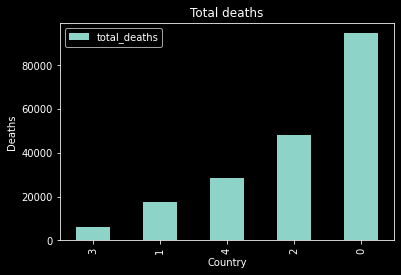

In [64]:

data_poverty= data_economic.groupby("location")["total_deaths"].max().reset_index()
data_poverty.sort_values(by= "total_deaths", inplace=True)
data_poverty.plot.bar()
plt.title("Total deaths")
plt.ylabel('Deaths')
plt.xlabel('Country')
plt.show()

In [40]:
n_br= data_brazil.tail(1)
n_sp= data_spain.tail(1)
n_iran= data_iran.tail(1)
n_mx= data_mexico.tail(1)
n_ntd= data_netherlands.tail(1)

frames= (n_br, n_sp, n_iran, n_mx, n_ntd)
comparative= pd.concat(frames)
comparative

,location,total_cases,total_deaths,new_cases,new_deaths
date,,,,,
2020-08-04,Brazil,2750318.0,94665.0,16641.0,561.0
2020-08-03,Spain,297054.0,28472.0,8532.0,27.0
2020-08-04,Iran,312035.0,17405.0,2598.0,215.0
2020-08-04,Mexico,443813.0,48012.0,4767.0,266.0
2020-08-04,Netherlands,55415.0,6140.0,372.0,0.0


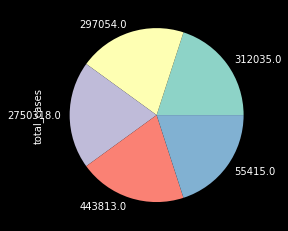

In [41]:
comparative['total_cases'].value_counts().plot.pie()
plt.show()